This project aims on training a neural network model for the task of image classification with TensorFlow. TensorFlow is an end-to-end open-source platform for machine learning. It has a comprehensive and flexible ecosystem of tools, libraries, and community resources that allow researchers to push cutting-edge advancements in ML, and developers to easily build and deploy machine learning-based applications.
Image Classification can also be done by using less complex models provided by Scikit-Learn, but by using TensorFlow we can build a neural network for the task of Image Classification. By building a neural network we can discover more hidden patterns than just classification.


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras   #high-level deep learning API in Python that makes it easy to build and train neural networks

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

The Fashion MNIST Dataset is an advanced version of the traditional MNIST dataset which is very much used as the “Hello, World” of machine learning. The MNIST dataset contains images of handwritten numbers (0, 1, 2, etc.)


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In the dataset, each image is mapped into a single label. Since the class names are not defined in the dataset, we need to store them here so that we can use them later when viewing the images

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Pre-processing the data**

The data must be preprocessed before training the neural network. If you inspect the first frame of the training set, you will find that the pixel values ​​are between 0 and 255

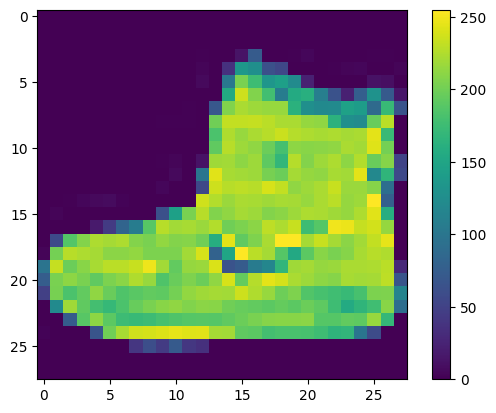

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Now we have to scale these values ​​to a range of 0 to 1 before passing them to the neural network model. To do this, we need to divide the values ​​by 255. The training set and the test set should be preprocessed in the same way

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and to verify that we are ready to create and train the neural network for image classification with TensorFlow, let’s display the first 25 images of the training set and display the name of the class under each image

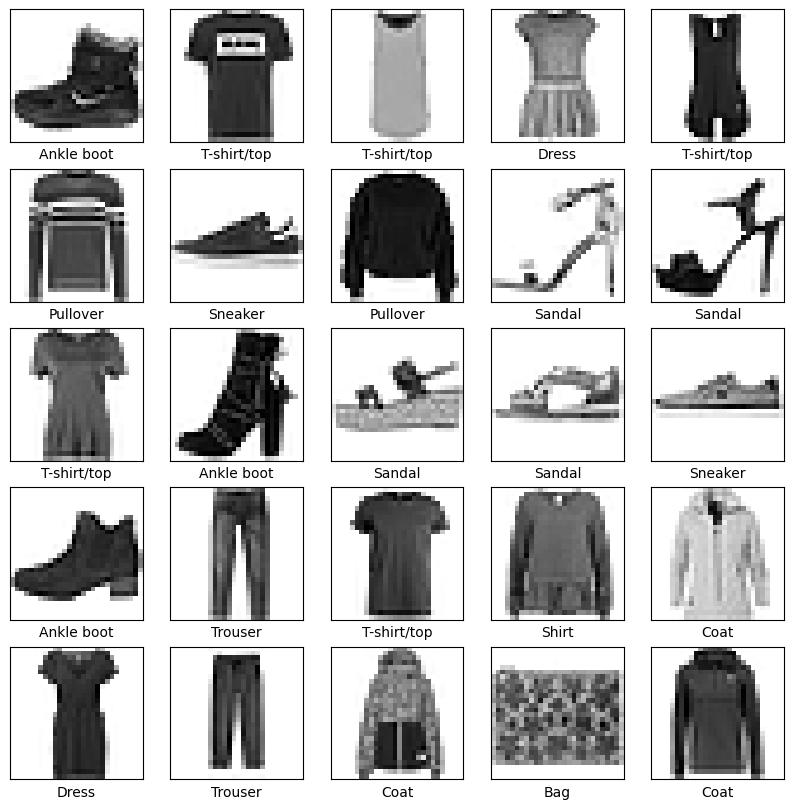

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Building Model**

Now to Build the neural network for the task of Image Classification with TensorFlow, we first need to configure the model layers and then move forward with compiling the model.

**Setting Up Layers**

The basic building block of neural networks is its layers. Layers work by extracting the representations from data fed into them. Most of the deep learning, Models involves doing simple layers together. Now, let’s create the layers of our neural network:

In [9]:
model = keras.Sequential([
    keras.Input(shape=(28, 28)),   #Input layer (Defines the input shape of the data, doesn’t do any computation, it just tells Keras what to expect.)
    keras.layers.Flatten(),    #Flatten layer (Converts the 2D image (28x28) into a 1D vector (784,))
    keras.layers.Dense(128, activation='relu'),  #Hidden layer (fully connected layer, Adds non-linearity, helps the network learn complex patterns.)
    keras.layers.Dense(10)    #Output layer (fully connected layer with 10 neuron, when training, you’ll usually apply softmax via your loss function)
])


**Compiling the model**

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training Model**

Now, let’s train the Neural Network for the task of Image Classification with TensorFlow, and make predictions on it:

In [11]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)

#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7838 - loss: 0.6208
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8603 - loss: 0.3893
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8758 - loss: 0.3419
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8865 - loss: 0.3101
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8927 - loss: 0.2907
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8978 - loss: 0.2773
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9022 - loss: 0.2614
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9051 - loss: 0.2562
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9099 - loss: 0.2466
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9116 - loss: 0.2389
313/313 - 1s - 3ms/step - accuracy: 0.8788 - loss: 0.3554

Test accuracy: 0.8787999749183655


In [12]:
#Make Predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.2107919e-06, 1.4949214e-09, 4.7060774e-07, 7.0108308e-07,
       1.2604137e-06, 1.2768495e-02, 7.3153392e-06, 6.1004423e-02,
       1.0273686e-06, 9.2621303e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the “confidence” of the model that the image matches each of the 10 different garments. Let’s see which label has the highest confidence value:

In [13]:
np.argmax(predictions[0])

np.int64(9)

Thus, the model is most convinced that this image is an ankle boot, or class_names [9]. Examination of the test label shows that this classification is correct:

In [14]:
test_labels[0]

np.uint8(9)

In [15]:
#Plotting predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Verify Predictions**

Let’s look at the 0th frame of the predictions and the prediction table. The correct prediction labels are blue and the incorrect prediction labels are red:

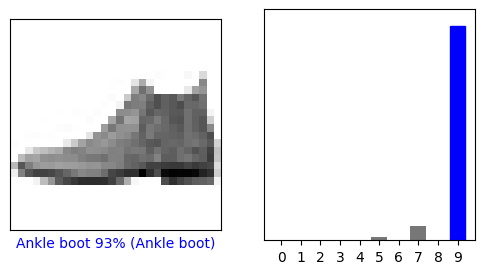

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

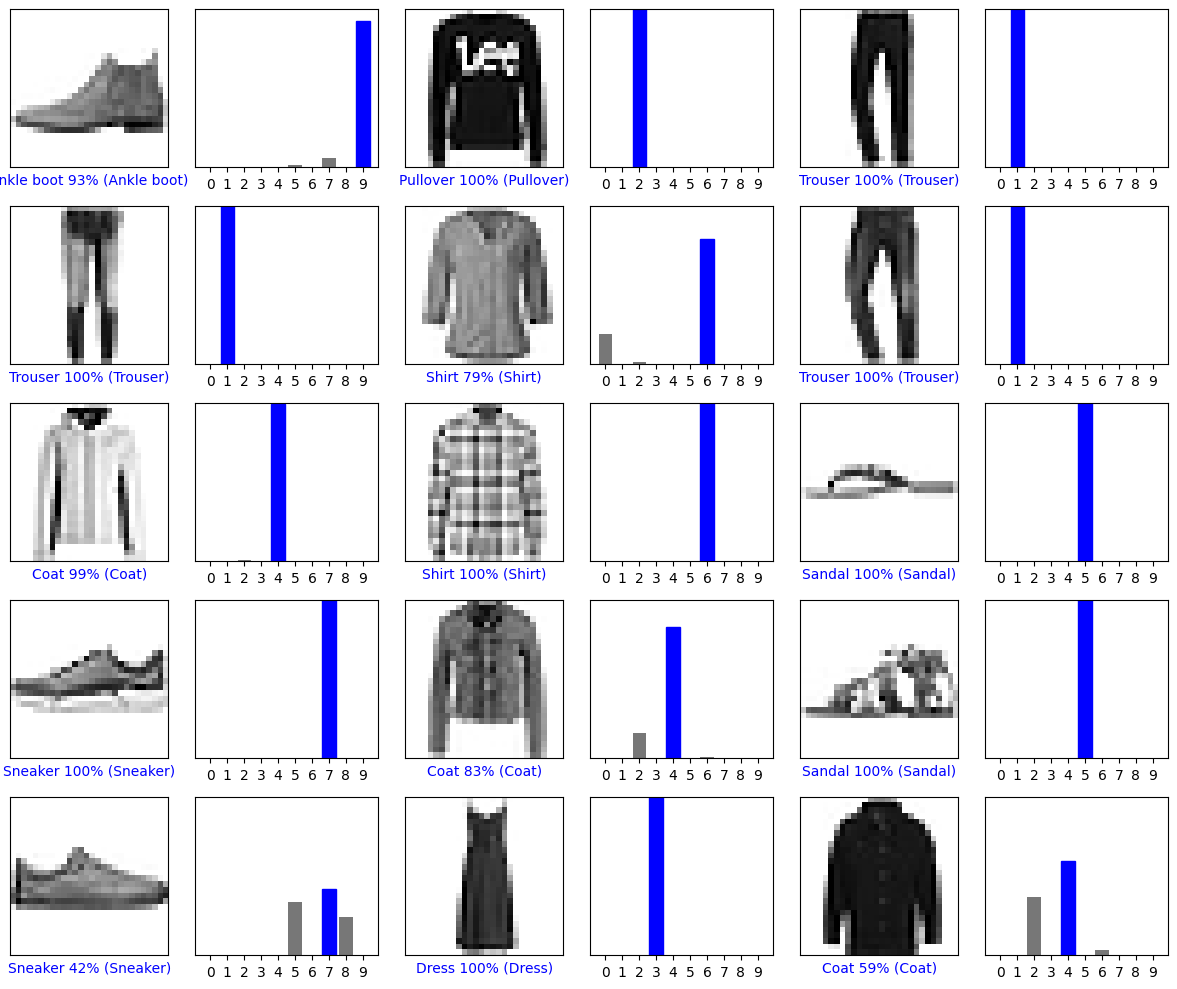

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()